#### Importing Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Data/Output/cleaned_langs_dataset.csv")

In [3]:
df.shape

(68978, 2)

#### Importing Necessary libraries for Training and Saving the Model

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import joblib

Initialize the Vectorizer and extract the features.

In [5]:
from tqdm import tqdm

corpus = []   
for index, row in tqdm(df.iterrows()):
    corpus.append(str(row['cleaned text']))

68978it [00:09, 7455.19it/s]


In [6]:
cv = CountVectorizer()

x = cv.fit_transform(corpus)
y = df.iloc[:,0].values

Split the Data on training and testing ones.

In [7]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=0)

Initializing the Classification Algorithm and fitting it to the learning data.

In [8]:
classifier = MultinomialNB()
classifier.fit(xTrain, yTrain)

MultinomialNB()

Predicting the results of the test Data using the obtained Classifier.

In [9]:
yPred = classifier.predict(xTest)

Perfomance measuring.

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(accuracy_score(yTest, yPred),'\n--------------------------------')
print(classification_report(yTest, yPred),'\n--------------------------------')

0.9609307045520441 
--------------------------------
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       710
           2       0.99      0.99      0.99       707
           3       1.00      1.00      1.00       750
           4       1.00      1.00      1.00       700
           5       0.94      1.00      0.97       691
           6       0.99      1.00      0.99       701
           7       0.99      1.00      1.00       686
           8       1.00      0.99      1.00       691
           9       0.99      0.99      0.99       668
          10       0.91      0.37      0.52       650
          11       0.99      0.99      0.99       651
          12       1.00      0.97      0.98       682
          13       0.99      0.99      0.99       667
          14       1.00      0.98      0.99       716
          15       0.99      0.96      0.98       654
          16       1.00      1.00      1.00       702
          17       1.00     

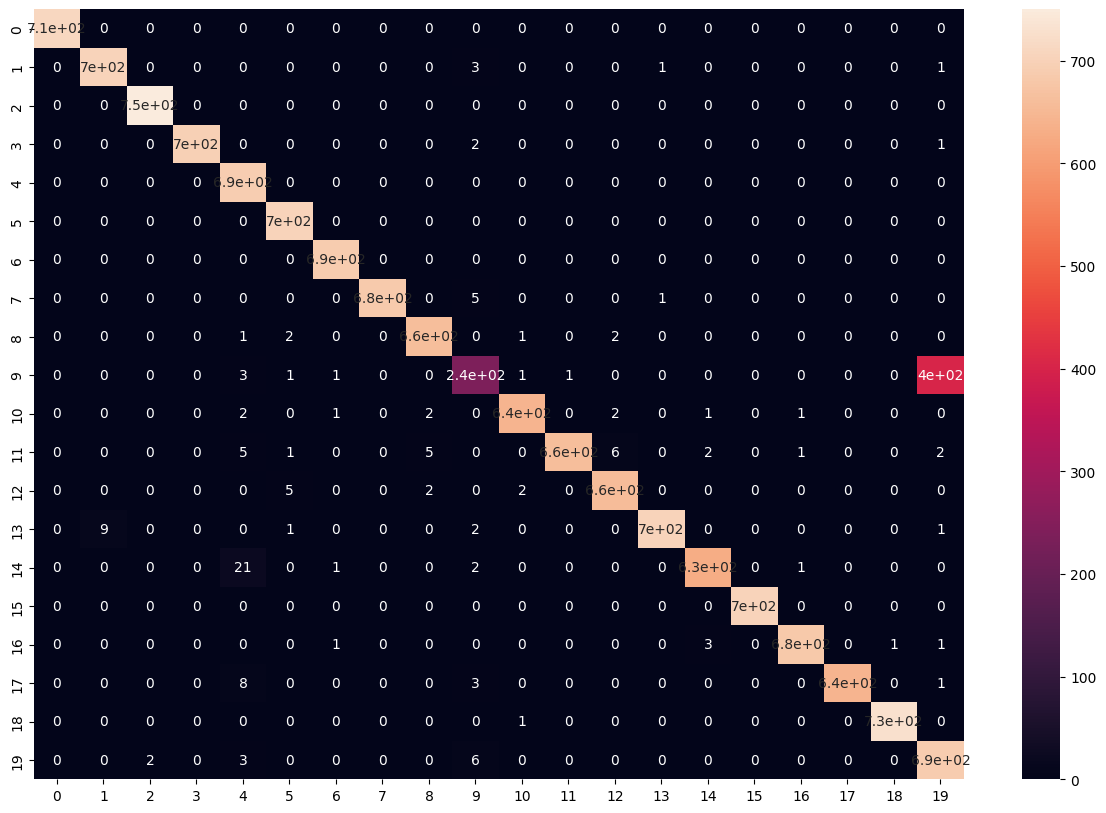

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(yTest, yPred), annot = True)
plt.show()

##### Saving the Models

In [12]:
joblib.dump(classifier, "Models/LD/classifier.pkl")
joblib.dump(cv, "Models/LD/verctorizer.pkl")

['Models/LD/verctorizer.pkl']